In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.preprocessing import normalize

# ignore all future warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

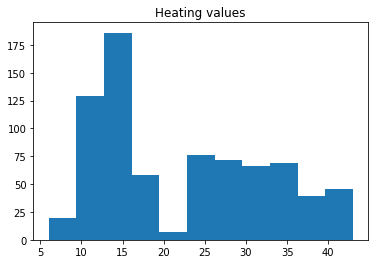

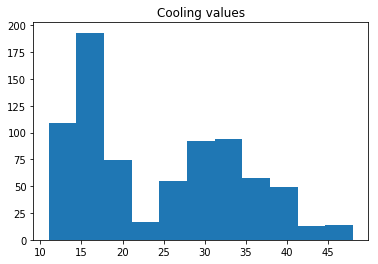

In [2]:
#Variables
dataframe=pd.read_csv("ENB2012_data.csv", header=None)
dataset = dataframe.values
x=dataset[:,0:8]
y1=dataset[:,8]
y2=dataset[:,9]

y1= np.around(y1)
y2= np.around(y2)

a = np.hstack(y1)
plt.hist(a, bins='auto')  # arguments are passed to np.histogram
plt.title("Heating values")
plt.show()

a = np.hstack(y2)
plt.hist(a, bins='auto')  # arguments are passed to np.histogram
plt.title("Cooling values")
plt.show()

In [3]:
unique, counts = np.unique(y1, return_counts=True)
class_counts_y1 = dict(zip(unique, counts))
print(class_counts_y1)

{6.0: 8, 7.0: 8, 8.0: 3, 9.0: 1, 10.0: 20, 11.0: 55, 12.0: 54, 13.0: 58, 14.0: 44, 15.0: 74, 16.0: 10, 17.0: 35, 18.0: 10, 19.0: 13, 20.0: 4, 21.0: 3, 23.0: 5, 24.0: 33, 25.0: 22, 26.0: 16, 27.0: 8, 28.0: 19, 29.0: 45, 30.0: 20, 31.0: 3, 32.0: 43, 33.0: 34, 34.0: 2, 35.0: 9, 36.0: 24, 37.0: 25, 38.0: 2, 39.0: 12, 40.0: 20, 41.0: 12, 42.0: 9, 43.0: 5}


In [4]:
# notice that some classes only have one example

# since we need to ensure that every class has at least 3 examples of each for
# k=3 k-folds, we'll drop entries that have too few samples
# otherwise we cannot do cross validation

dataset_y1 = np.array([row for row in dataset if class_counts_y1[np.around(row[8])] > 2])

x1 = dataset_y1[:,0:8]
y1 = dataset_y1[:,8]

y1 = np.around(y1)

# same for y2 (cooling load)
unique, counts = np.unique(y2, return_counts=True)
class_counts_y2 = dict(zip(unique, counts))

dataset_y2 = np.array([row for row in dataset if class_counts_y2[np.around(row[9])] > 2])

x2 = dataset_y2[:,0:8]
y2 = dataset_y2[:,9]

y2 = np.around(y2)

y1 = np.reshape(y1, (-1,1))
y2 = np.reshape(y2, (-1,1))

print(len(y1), len(x1))


763 763


In [5]:
# logistic regression (heating)
regression_model1 = LogisticRegression()

# model evaluation (this does train/test splits for us)
accuracy = cross_val_score(regression_model1, x1, y1.ravel())

train_sizes, train_scores, test_scores = learning_curve(regression_model1, x1, y1.ravel(), cv=3)

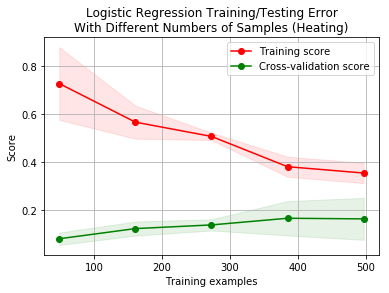

Number of classes: 37
Accuracy of the model is 0.15234702224924937.
(random selection accuracy is 0.027027)


In [6]:
plt.figure()
plt.title("Logistic Regression Training/Testing Error\nWith Different Numbers of Samples (Heating)")
plt.xlabel("Training examples")
plt.ylabel("Score")
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")
plt.show()

# printing values (notice high variance with large number of training samples)
print('Number of classes: %i' % len(class_counts_y1))
print('Accuracy of the model is {}.'.format(accuracy.mean()))

# for comparison, random class selection accuracy, which makes our accuracy not that bad
print('(random selection accuracy is %f)' % (1/len(class_counts_y1)))

In [7]:
# logistic regression (cooling)
regression_model2 = LogisticRegression()

# model evaluation (this does train/test splits for us)
accuracy = cross_val_score(regression_model2, x2, y2.ravel())

train_sizes, train_scores, test_scores = learning_curve(regression_model1, x2, y2.ravel(), cv=3)

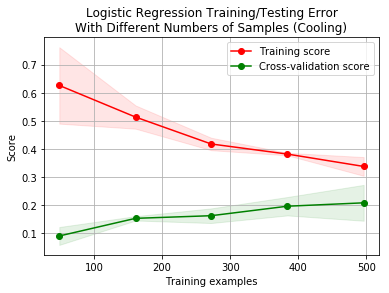

Number of classes: 38
Accuracy of the model is 0.20863633385744237.
(random selection accuracy is 0.026316)


In [8]:
plt.figure()
plt.title("Logistic Regression Training/Testing Error\nWith Different Numbers of Samples (Cooling)")
plt.xlabel("Training examples")
plt.ylabel("Score")
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")
plt.show()

# printing values (notice high variance with large number of training samples)
print('Number of classes: %i' % len(class_counts_y2))
print('Accuracy of the model is {}.'.format(accuracy.mean()))

# for comparison, random class selection accuracy, which makes our accuracy not that bad
print('(random selection accuracy is %f)' % (1/len(class_counts_y2)))